In [88]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [89]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [90]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [91]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-87.99686512427235 -109.11497974860528
-64.2047702635397 -32.88067737941941
48.28987959284697 129.6624742351122
10.178751523456555 92.74690681745483
-19.17988310083581 -51.033151501215514
-46.46540282561201 0.46317443008979353
-12.104992929360435 9.466228955478812
-51.51662333235569 -116.7576323634253
52.733389772044745 39.075321705179874
52.85914175517945 -68.283521437583
-86.67797981705556 -15.657561401102896
66.83948614935684 121.4794548315528
-4.424474718429678 -136.5717503289428
-61.349367749770266 139.30025521953564
83.6315124340804 120.67922158065215
-4.868799683624843 107.14164193512602
80.50604163087144 -101.14708344308276
-65.96044511841802 -84.53856004910617
50.83897732406328 -82.9590052621549
56.42116485931291 77.80321080397101
30.922522582188407 137.33438619163974
-39.57942250321891 144.3078225067827
-64.69529254482028 -77.52796525527589
-42.55189306227855 -91.86889228014262
-56.789013290984684 167.14976143109686
-7.111579044360923 -94.29349311994179
-65.14348977296365 -11

16.168534347569874 -154.752139904228
-61.66694859608715 36.393300653617445
-57.916476756918826 161.96454804851902
88.11228454360926 -72.31903075089251
67.01244116795002 28.2789808760742
-55.30266744525673 74.9739392993904
-9.982289601530937 41.383117423131836
27.960347693095116 112.28766537276027
85.04478681719894 112.90126920478883
26.30182385560559 72.9196692618448
69.44276853925456 -36.45091821898666
61.727544345403885 21.143723422236263
-41.21507152528676 119.92987961254397
-72.97609552272054 26.211282463690253
34.001052992994744 3.5583691413927454
-73.43044388026726 -27.71565477461712
80.6726012249056 168.02956253438248
72.74866011055337 -75.98934835601325
-52.15537018435318 -21.196941634429606
77.56284365056302 -67.80038978715884
-49.288908272647326 -103.20485765011958
-56.29307032073062 143.2541761011347
83.34912544736 -25.97853390101912
-67.05221111162777 52.652910077464725
47.68405588596744 158.2283973710596
-72.62752557511145 78.920892082514
84.71496407803534 -64.839951780630

In [92]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [93]:
import requests
requests.__version__

'2.27.1'

In [204]:
# Import the requests library.
import requests

# Import the API key
from config2 import weather_api_key

In [205]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key + "&q=" +"concord"


In [206]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [207]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retreival      ")
print("                              ")

# Create Counters.
record_count = 1
set_count = 1

Beginning Data Retreival      
                              


In [11]:
# Loop through all the cities in our list.
for i, city in enumerate(cities):
    
    #Group cities in sets of 50 for loggin purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)
        
    # Create endponit URL with each city.
    city_url = url + '&q=' + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    #Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | leua
Processing Record 2 of Set 1 | ambon
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | pierre
Processing Record 5 of Set 1 | abiy adi
City not found. Skipping...
Processing Record 6 of Set 1 | mehamn
Processing Record 7 of Set 1 | kaeo
Processing Record 8 of Set 1 | busselton
Processing Record 9 of Set 1 | tuktoyaktuk
Processing Record 10 of Set 1 | himeji
Processing Record 11 of Set 1 | puerto ayora
Processing Record 12 of Set 1 | biak
Processing Record 13 of Set 1 | hofn
Processing Record 14 of Set 1 | hervey bay
Processing Record 15 of Set 1 | port elizabeth
Processing Record 16 of Set 1 | dikson
Processing Record 17 of Set 1 | punta arenas
Processing Record 18 of Set 1 | kodiak
Processing Record 19 of Set 1 | leningradskiy
Processing Record 20 of Set 1 | maloy
Processing Record 21 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 22 of Set 1 | sobolevo
Processing Record 23 of Set 1 | ilulissat
Processing Recor

Processing Record 40 of Set 4 | staraya kulatka
Processing Record 41 of Set 4 | bongor
Processing Record 42 of Set 4 | nanhai
Processing Record 43 of Set 4 | ponta do sol
Processing Record 44 of Set 4 | cape town
Processing Record 45 of Set 4 | topeka
Processing Record 46 of Set 4 | pevek
Processing Record 47 of Set 4 | beloha
Processing Record 48 of Set 4 | jacareacanga
Processing Record 49 of Set 4 | bagotville
Processing Record 50 of Set 4 | san antonio
Processing Record 1 of Set 5 | flinders
Processing Record 2 of Set 5 | egvekinot
Processing Record 3 of Set 5 | manitouwadge
Processing Record 4 of Set 5 | dunedin
Processing Record 5 of Set 5 | jadu
Processing Record 6 of Set 5 | aklavik
Processing Record 7 of Set 5 | huoqiu
Processing Record 8 of Set 5 | tromso
Processing Record 9 of Set 5 | guajara
Processing Record 10 of Set 5 | rangapara
Processing Record 11 of Set 5 | pangnirtung
Processing Record 12 of Set 5 | tulua
Processing Record 13 of Set 5 | hithadhoo
Processing Record 1

Processing Record 27 of Set 8 | nioro
Processing Record 28 of Set 8 | tautira
Processing Record 29 of Set 8 | jamnagar
Processing Record 30 of Set 8 | mantua
Processing Record 31 of Set 8 | kamenka
Processing Record 32 of Set 8 | severo-kurilsk
Processing Record 33 of Set 8 | oranjestad
Processing Record 34 of Set 8 | melnikovo
Processing Record 35 of Set 8 | fortuna
Processing Record 36 of Set 8 | ulaangom
Processing Record 37 of Set 8 | carutapera
Processing Record 38 of Set 8 | solsvik
City not found. Skipping...
Processing Record 39 of Set 8 | baykit
Processing Record 40 of Set 8 | sangar
Processing Record 41 of Set 8 | atar
Processing Record 42 of Set 8 | bath
Processing Record 43 of Set 8 | paamiut
Processing Record 44 of Set 8 | kyzyl-suu
Processing Record 45 of Set 8 | abu samrah
Processing Record 46 of Set 8 | boa vista
Processing Record 47 of Set 8 | viedma
Processing Record 48 of Set 8 | shubarshi
Processing Record 49 of Set 8 | vestmannaeyjar
Processing Record 50 of Set 8 |

Processing Record 15 of Set 12 | honiara
Processing Record 16 of Set 12 | tomohon
Processing Record 17 of Set 12 | dabat
Processing Record 18 of Set 12 | beroroha
Processing Record 19 of Set 12 | elko
Processing Record 20 of Set 12 | beira
Processing Record 21 of Set 12 | moindou
Processing Record 22 of Set 12 | tyup
Processing Record 23 of Set 12 | zabaykalsk
Processing Record 24 of Set 12 | soe
Processing Record 25 of Set 12 | kununurra
Processing Record 26 of Set 12 | bilibino
Processing Record 27 of Set 12 | energetik
Processing Record 28 of Set 12 | kalmunai
Processing Record 29 of Set 12 | venado tuerto
Processing Record 30 of Set 12 | turayf
Processing Record 31 of Set 12 | tecoanapa
Processing Record 32 of Set 12 | ituni
City not found. Skipping...
Processing Record 33 of Set 12 | caibarien
Processing Record 34 of Set 12 | valparaiso
Processing Record 35 of Set 12 | kidodi
Processing Record 36 of Set 12 | shache
Processing Record 37 of Set 12 | savinskiy
Processing Record 38 of

In [20]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Leua,SK,2022-03-08 17:54:30,48.2156,18.6071,41.34,60,34,7.43
1,Ambon,ID,2022-03-08 17:54:30,-3.6954,128.1814,77.14,94,40,3.44
2,Ushuaia,AR,2022-03-08 17:50:20,-54.8000,-68.3000,56.86,54,75,19.57
3,Pierre,US,2022-03-08 17:54:31,44.3683,-100.3510,37.06,55,100,11.99
4,Mehamn,NO,2022-03-08 17:54:32,71.0357,27.8492,33.71,79,97,21.47
5,Kaeo,NZ,2022-03-08 17:54:32,-35.1000,173.7833,67.17,73,100,8.28
6,Busselton,AU,2022-03-08 17:54:32,-33.6500,115.3333,67.05,61,59,13.04
7,Tuktoyaktuk,CA,2022-03-08 17:54:33,69.4541,-133.0374,-9.40,84,100,2.30
8,Himeji,JP,2022-03-08 17:54:33,34.8167,134.7000,43.61,58,14,4.92
9,Puerto Ayora,EC,2022-03-08 17:54:34,-0.7393,-90.3518,84.16,95,45,1.01


In [21]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [22]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

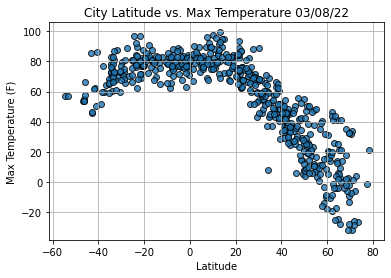

In [24]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

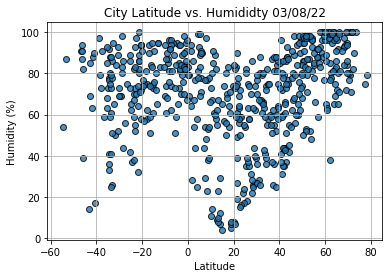

In [26]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humididty "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()

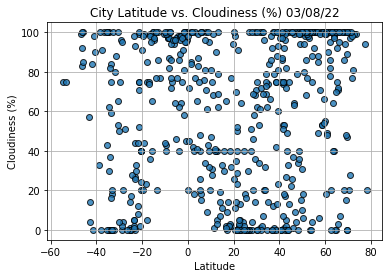

In [27]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

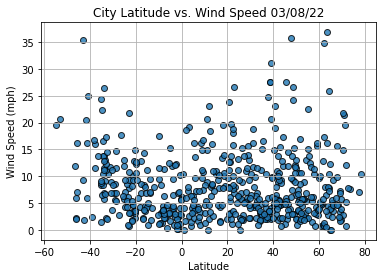

In [28]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [158]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


In [159]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

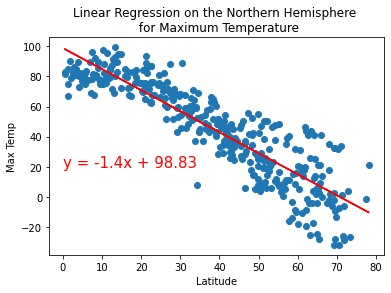

In [161]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Maximum Temperature', 'Max Temp',(0,20))

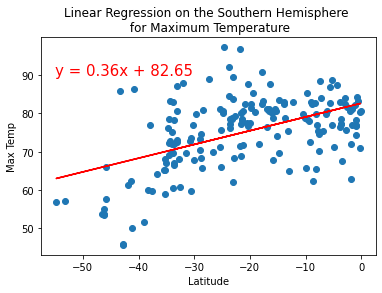

In [173]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-55,90))

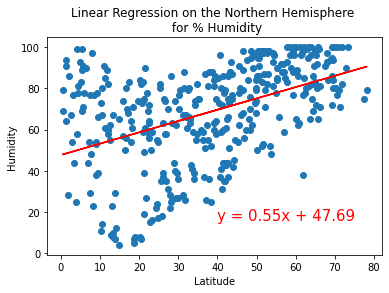

In [174]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', 'Humidity',(40,16))

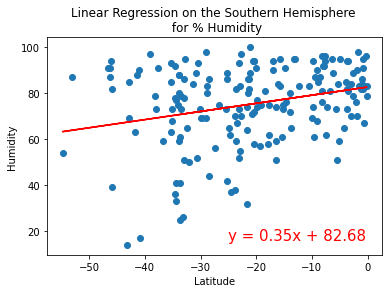

In [175]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', 'Humidity',(-25,16))


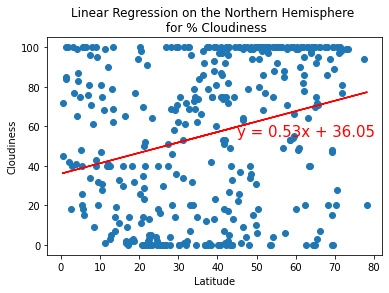

In [187]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Cloudiness', 'Cloudiness',(45,55))


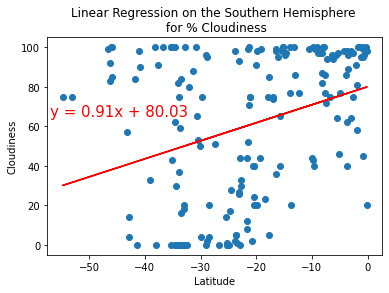

In [190]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', 'Cloudiness',(-57,65))


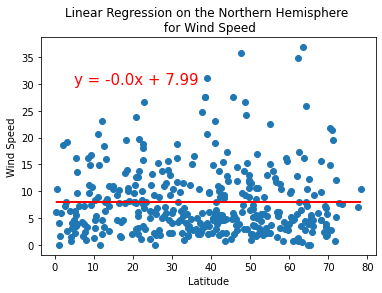

In [195]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(5,30))

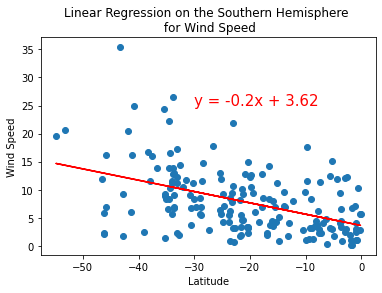

In [200]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-30,25))

In [226]:
# Import the dependencies.
import pandas as pd
import gmaps
import requests
# Import the API key.
from config3 import g_key